#### 링크
* [네이버 오픈 API 목록 - INTRO](https://www.google.com/url?q=https%3A%2F%2Fdevelopers.naver.com%2Fproducts%2Fintro%2Fplan%2Fplan.md)
* [애플리케이션 - NAVER Developers](https://www.google.com/url?q=https%3A%2F%2Fdevelopers.naver.com%2Fapps%2F%23%2Flist)
* [github - proj0](https://github.com/FC-InnerCircle-ICB1/proj0-api-biz-eda)

#### 임시

##### 리더님 네이버 API 인증 정보
* CLIENT_ID = 'uD_1kctG8tlAmJx1XoRX'
* CLIENT_SECRET = '4PZh2CBqA1'


In [ ]:
!pip install -q koreanize-matplotlib  # prompt: koreanize_matplotlib 설치 및 설정

from google.colab import userdata

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.6 MB/s eta 0:00:00


In [ ]:
# 네이버 API 인증 정보 설정
# 설정 방법 : 본 코랩 왼쪽 메뉴 아이콘 중 보안비밀 메뉴 (열쇠모양)로 진입하여 보안키명에 맞는 값 추가
naver_api_client_id = userdata.get('client_id')
naver_api_client_secret = userdata.get('client_secret')

In [ ]:
# 키워드 설정
keywords = ["크리스마스"]
new_names = ["christmas"]  # 간소화 이름

In [ ]:
# 통합 검색어 트렌드 조회 API 호출
def get_search_trend_data(keywords, start_date, end_date, time_unit="date"):
    """
    네이버 데이터랩 API를 사용하여 여러 키워드의 검색 트렌드 데이터를 가져옵니다.
    """
    # 네이버 API 데이터랩(쇼핑인사이트) > 통합 검색어 트렌드 조회
    url = "https://openapi.naver.com/v1/datalab/search"

    # 헤더 설정
    headers = {
        "X-Naver-Client-Id": naver_api_client_id,
        "X-Naver-Client-Secret": naver_api_client_secret
    }

    # 키워드 그룹 생성
    keyword_groups = [{"groupName": keyword, "keywords": [keyword]} for keyword in keywords]
    payload = {
        "startDate": start_date,
        "endDate": end_date,
        "timeUnit": time_unit,
        "keywordGroups": keyword_groups
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# 년도별 데이터 수집 및 시각화
def analyze_multiple_years_search_trend(keywords, new_names, date_ranges):
    all_data = []
    for year, (start_date, end_date) in date_ranges.items():
        data = get_search_trend_data(keywords, start_date, end_date)
        if data:
            for result, new_name in zip(data['results'], new_names):
                temp_df = pd.DataFrame(result['data'])
                temp_df['period'] = pd.to_datetime(temp_df['period'])
                temp_df['ratio'] = temp_df['ratio']
                temp_df['keyword'] = new_name
                temp_df['year'] = year
                all_data.append(temp_df)
        else:
            print(f"{year} 데이터 수집에 실패했습니다.")

    # 데이터 통합
    df = pd.concat(all_data, ignore_index=True)

    # 날짜를 연도에 관계없이 동일한 범위로 정렬 (12-10부터 12-31)
    df['day_of_month'] = df['period'].dt.strftime('%m-%d')

    # 시각화
    plt.figure(figsize=(12, 6))
    for year in df['year'].unique():
        year_data = df[df['year'] == year]
        plt.plot(year_data['day_of_month'], year_data['ratio'], marker='o', label=f"{year}")

    plt.title("Christmas keyword queries (2021-2023)", fontsize=14)
    plt.xlabel("Day of November ~ December", fontsize=12)
    plt.ylabel("Search Ratio", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

    return df

In [ ]:
# 인기 키워드 수집
def analyze_search_trend(keywords, new_names, date_ranges):
    all_data = []
    for year, (start_date, end_date) in date_ranges.items():
        data = get_search_trend_data(keywords, start_date, end_date)
        if data:
            for result, new_name in zip(data['results'], new_names):
                temp_df = pd.DataFrame(result['data'])
                temp_df['period'] = pd.to_datetime(temp_df['period'])
                temp_df['ratio'] = temp_df['ratio']
                temp_df['keyword'] = new_name
                temp_df['year'] = year
                all_data.append(temp_df)
        else:
            print(f"{year} 데이터 수집에 실패했습니다.")

    # 데이터 통합
    df = pd.concat(all_data, ignore_index=True)

    # 날짜를 연도에 관계없이 동일한 범위로 정렬 (12-10부터 12-31)
    df['day_of_month'] = df['period'].dt.strftime('%m-%d')

    # 시각화
    plt.figure(figsize=(12, 6))
    for year in df['year'].unique():
        year_data = df[df['year'] == year]
        plt.plot(year_data['day_of_month'], year_data['ratio'], marker='o', label=f"{year}")

    plt.title("Christmas keyword queries (2021-2023)", fontsize=14)
    plt.xlabel("Day of November ~ December", fontsize=12)
    plt.ylabel("Search Ratio", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

    return df

키워드 검색 트렌드 연도별 분석 중...


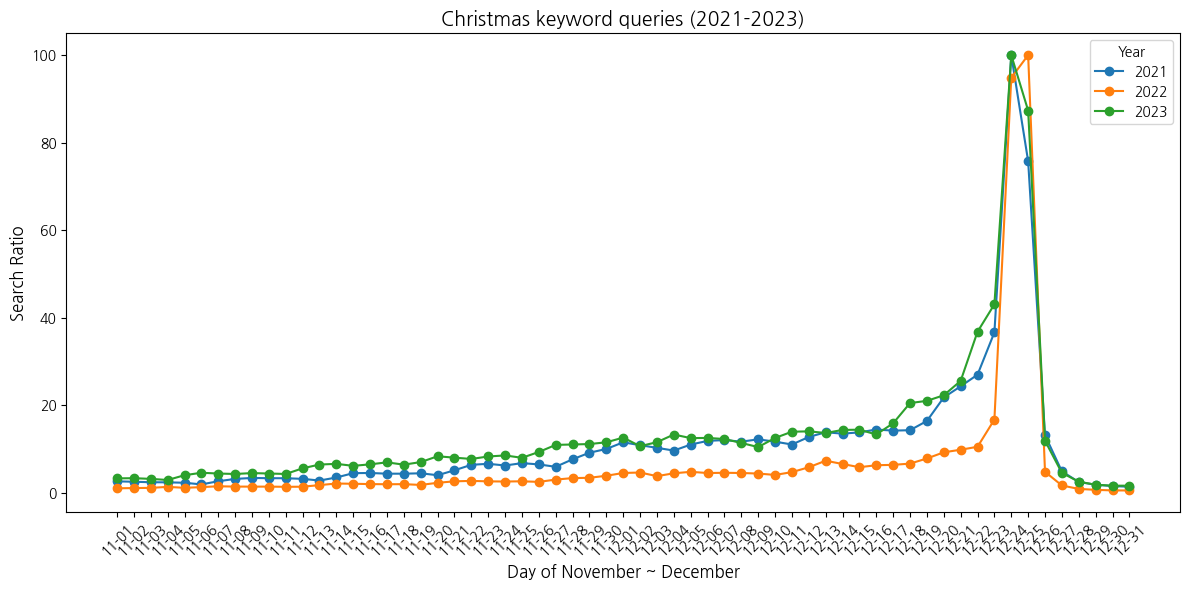

수집된 데이터:
      period    ratio    keyword  year day_of_month
0 2021-11-01  2.65277  christmas  2021        11-01
1 2021-11-02  2.56387  christmas  2021        11-02
2 2021-11-03  2.45166  christmas  2021        11-03
3 2021-11-04  2.43320  christmas  2021        11-04
4 2021-11-05  2.33265  christmas  2021        11-05


In [ ]:
# 검색 대상 일자 지정을 위한 분석
if __name__ == "__main__":
    # 연도별 날짜 범위
    date_ranges = {
        2021: ("2021-11-01", "2021-12-31"),
        2022: ("2022-11-01", "2022-12-31"),
        2023: ("2023-11-01", "2023-12-31")
    }

    print("키워드 검색 트렌드 연도별 분석 중...")
    df = analyze_multiple_years_search_trend(keywords, new_names, date_ranges)

    if not df.empty:
        print("수집된 데이터:")
        print(df.head())
    else:
        print("데이터 수집에 실패했습니다.")

In [40]:

# API 요청 URL
# url = "https://openapi.naver.com/v1/datalab/shopping/categories"
url = "https://openapi.naver.com/v1/datalab/shopping/category/keywords"

# 요청 헤더
headers = {
    "X-Naver-Client-Id": naver_api_client_id,
    "X-Naver-Client-Secret": naver_api_client_secret,
    "Content-Type": "application/json",
}

# 사용 가능한 카테고리와 이름 설정 (네이버 데이터랩 카테고리 코드 참조)
categories = [
    {"name": "화장품/미용", "param": ["50000002"]}
]

# 분석 기간 및 추가 필터링 조건
start_date = "2023-12-15"
end_date = "2023-12-26"
time_unit = "date"
devices = ["pc", "mobile"]
genders = "all"
ages = ["10", "20", "30", "40", "50", "60"]

# 결과를 저장할 리스트
all_results = []

body = {
    "startDate": start_date,
    "endDate": end_date,
    "timeUnit": time_unit,
    "category": categories,  # 화장품/미용
#    "gender": "all",
    "ages": ages
}

# API 요청
response = requests.post(url, headers=headers, json=body)

# 응답 처리
if response.status_code == 200:
    data = response.json()
    for category_data in data["results"]:
        for period_data in category_data["data"]:
            for keyword in period_data["ratioKeywords"]:
                all_results.append({
                    "date": period_data["period"],
                    "category": category_data["title"],
                    "keyword": keyword["name"],
                    "keywordRatio": keyword["ratio"],
                })
else:
#    print(f"API 요청 실패: 카테고리 {category['name']}, 상태 코드: {response.status_code}")
    print("오류 메시지:", response.text)

# 데이터프레임 생성
df = pd.DataFrame(all_results)

# 데이터 출력
if not df.empty:
    print("수집된 데이터:")
    print(df.head())

    # 데이터 저장
    df.to_csv("naver_shopping_multiple_categories.csv", index=False)
    print("분석 결과가 'naver_shopping_multiple_categories.csv'에 저장되었습니다.")
else:
    print("수집된 데이터가 없습니다.")

오류 메시지: {"errMsg":"TypeError: .category -> should be string","errId":"2024-12-23T22:10:45+09:00/495914474-916405564","body":"{\"startDate\":\"2023-12-15\",\"endDate\":\"2023-12-26\",\"timeUnit\":\"date\",\"category\":[{\"name\":\"화장품/미용\",\"param\":[\"50000002\"]}],\"ages\":[\"10\",\"20\",\"30\",\"40\",\"50\",\"60\"]}"}
수집된 데이터가 없습니다.


프롬프트 :